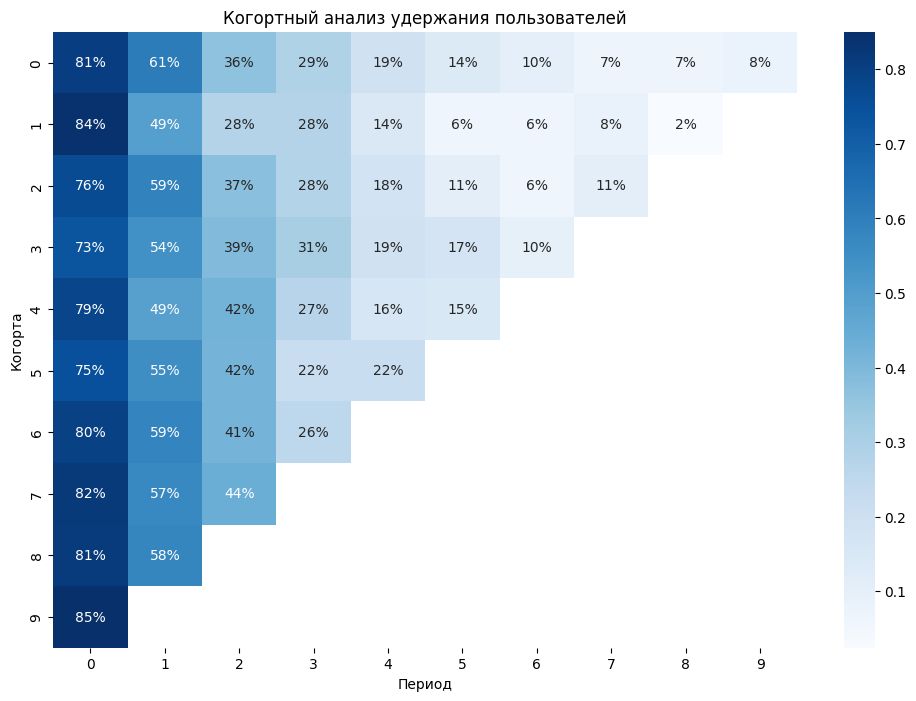

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
# Настройки генерации данных
NUM_USERS = 1000
NUM_COHORTS = 10
MAX_PERIODS = 12

# Генерация базовых данных пользователей
np.random.seed(42)
user_ids = np.arange(NUM_USERS)
cohorts = np.random.randint(0, NUM_COHORTS, size=NUM_USERS)

# Исправленная генерация дат с DateOffset
base_date = pd.to_datetime('2023-01-01')
users = pd.DataFrame({
    'user_id': user_ids,
    'cohort': cohorts,
    'join_date': [base_date + pd.DateOffset(months=int(x)) for x in cohorts]
})

# Генерация данных активности
data = []
for user in users.itertuples():
    max_periods = min(MAX_PERIODS, NUM_COHORTS - user.cohort)
    base_retention = 0.8
    
    for period in range(0, max_periods):
        retention_prob = base_retention * (0.7 ** period)
        is_active = np.random.choice([0, 1], p=[1-retention_prob, retention_prob])
        
        data.append({
            'user_id': user.user_id,
            'cohort': user.cohort,
            'join_date': user.join_date,
            'period': period,
            'is_active': is_active,
            'revenue': np.random.poisson(lam=10) if is_active else 0
        })

# Создаем итоговый DataFrame
cohort_data = pd.DataFrame(data)

# Визуализация
retention_table = cohort_data.pivot_table(
    index='cohort',
    columns='period',
    values='is_active',
    aggfunc='mean'
)



plt.figure(figsize=(12, 8))
sns.heatmap(retention_table, annot=True, fmt='.0%', cmap='Blues')
plt.title('Когортный анализ удержания пользователей')
plt.xlabel('Период')
plt.ylabel('Когорта')
plt.show()

In [5]:
cohort_data.to_csv("cohort_data.csv", index=False, encoding='utf-8-sig')

In [6]:
cohort_data.head()

,user_id,cohort,join_date,period,is_active,revenue
0,0,6,2023-07-01,0,1,12
1,0,6,2023-07-01,1,0,0
2,0,6,2023-07-01,2,1,13
3,0,6,2023-07-01,3,0,0
4,1,3,2023-04-01,0,1,9


In [7]:
cohort_data.shape

(5552, 6)

In [8]:
cohort_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5552 entries, 0 to 5551
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   user_id    5552 non-null   int64         
 1   cohort     5552 non-null   int64         
 2   join_date  5552 non-null   datetime64[ns]
 3   period     5552 non-null   int64         
 4   is_active  5552 non-null   int64         
 5   revenue    5552 non-null   int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 260.4 KB


In [9]:
cohort_data.describe()

,user_id,cohort,join_date,period,is_active,revenue
count,5552.000000,5552.000000,5552,5552.000000,5552.000000,5552.000000
mean,499.676153,2.922190,2023-03-30 01:26:37.694524416,3.038905,0.369597,3.708934
min,0.000000,0.000000,2023-01-01 00:00:00,0.000000,0.000000,0.000000
25%,252.000000,1.000000,2023-02-01 00:00:00,1.000000,0.000000,0.000000
50%,498.000000,2.000000,2023-03-01 00:00:00,3.000000,0.000000,0.000000
75%,744.000000,5.000000,2023-06-01 00:00:00,5.000000,1.000000,9.000000
max,999.000000,9.000000,2023-10-01 00:00:00,9.000000,1.000000,21.000000
std,286.896913,2.460364,NaN,2.471804,0.482739,5.189329
